# Individual Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("schools_combined.csv")
df


,Unnamed: 0,region,province,municipality,division,school_id,school_name,year_level,gender,enrollment,latitude,longitude,ID,Total_Enro,Total_Inst,Rooms_used,Rooms_unused,Type_of_Sc
0,0,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 1,male,41,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
1,1,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 1,female,30,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
2,2,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 2,male,37,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
3,3,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 2,female,38,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
4,4,Region I - Ilocos Region,Ilocos Norte,Bacarra,Ilocos Norte,100002,Bacarra CES,grade 3,male,41,18.25096389,120.6089583,100002,318,16,12.0,0.0,School with no Annexes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159739,159739,Region I - Ilocos Region,Ilocos Sur,City Of Candon,Candon City,322601,Candon City Information Technology NHS,second year,female,39,17.15986111,120.4347361,322601,216,8,7.0,0.0,School with no Annexes
159740,159740,Region I - Ilocos Region,Ilocos Sur,City Of Candon,Candon City,322601,Candon City Information Technology NHS,third year,male,30,17.15986111,120.4347361,322601,216,8,7.0,0.0,School with no Annexes
159741,159741,Region I - Ilocos Region,Ilocos Sur,City Of Candon,Candon City,322601,Candon City Information Technology NHS,third year,female,40,17.15986111,120.4347361,322601,216,8,7.0,0.0,School with no Annexes
159742,159742,Region I - Ilocos Region,Ilocos Sur,City Of Candon,Candon City,322601,Candon City Information Technology NHS,fourth year,male,26,17.15986111,120.4347361,322601,216,8,7.0,0.0,School with no Annexes


**Let's practice creating plots! Try replicating the following images:**

1. Number of enrolled students per region arranged alphabetically

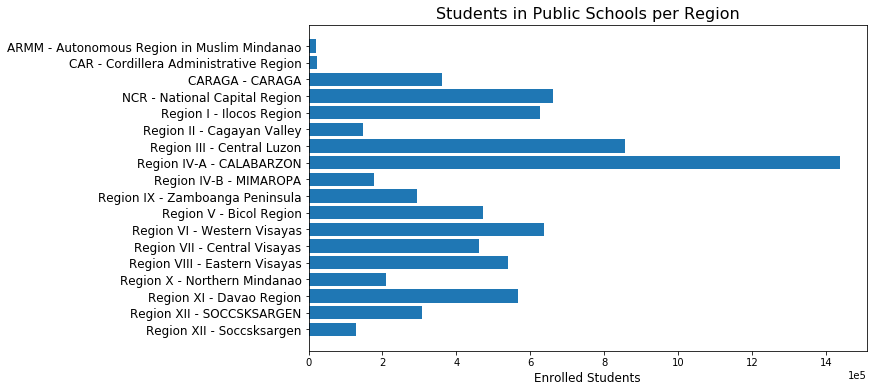

*Hint: figsize=10,6; axis labels fontsize=12; title fontsize=16*

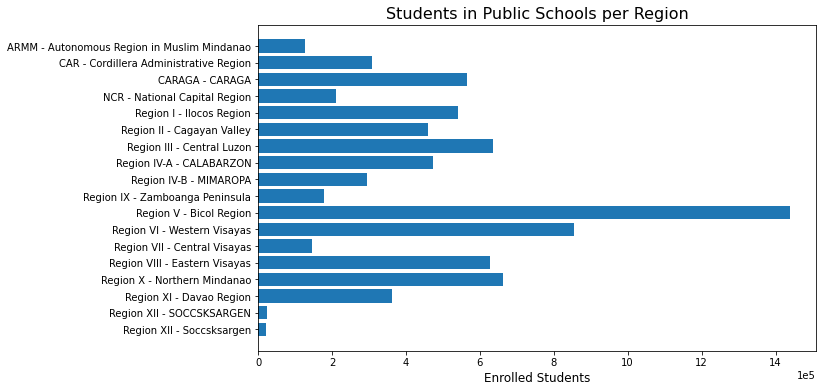

In [22]:
# Insert code here
df.groupby(['region'])[['enrollment']].sum()

bar_df = df.groupby('region')[['enrollment']].sum()
plt.figure(figsize=(10, 6))
plt.barh(bar_df.index[::-1], bar_df['enrollment'])
plt.title("Students in Public Schools per Region", fontsize = 16)
plt.xlabel("Enrolled Students", fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(5,5))
#plt.ticklabel_format(scilimits = (0, 5))
plt.show()


In [19]:
df["region"].value_counts()

Region VIII - Eastern Visayas                  22820
Region VI - Western Visayas                    16760
Region I - Ilocos Region                       16380
Region IV-A - CALABARZON                       13568
Region IX - Zamboanga Peninsula                13300
Region III - Central Luzon                     12564
Region V - Bicol Region                        12300
CARAGA - CARAGA                                11388
Region VII - Central Visayas                   10708
Region XII - SOCCSKSARGEN                       8124
Region XI - Davao Region                        6980
Region IV-B - MIMAROPA                          4668
Region II - Cagayan Valley                      4040
Region X - Northern Mindanao                    2204
NCR - National Capital Region                   1952
Region XII - Soccsksargen                       1256
CAR - Cordillera Administrative Region           368
ARMM - Autonomous Region in Muslim Mindanao      364
Name: region, dtype: int64

2. Number of schools, teachers, and classroom in each district of Metro Manila. The dataset has been prepared for you.

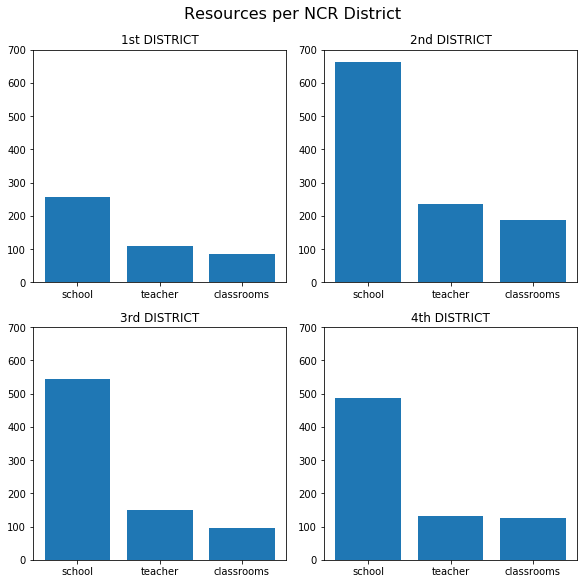

*Hint: figsize=8,8; title fontsize=16*

In [24]:
ncr = df[df["region"]=="NCR - National Capital Region"]
ncr_district = (ncr.groupby(["province"])["school_id", "Total_Inst", "Rooms_used"]
                .agg(school=("school_id", len), 
                     teacher=("Total_Inst", max),
                     classrooms=("Rooms_used", max))
                .reset_index()
                .melt(id_vars=["province"])).set_index("province")
ncr_district

<ipython-input-24-0586e9f435c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ncr_district = (ncr.groupby(["province"])["school_id", "Total_Inst", "Rooms_used"]


,variable,value
province,,
"Manila, Ncr, First District",school,256.0
Ncr Fourth District,school,488.0
Ncr Second District,school,664.0
Ncr Third District,school,544.0
"Manila, Ncr, First District",teacher,110.0
Ncr Fourth District,teacher,132.0
Ncr Second District,teacher,236.0
Ncr Third District,teacher,151.0
"Manila, Ncr, First District",classrooms,85.0


In [25]:
ncr_district[ncr_district.index == 'Manila, Ncr, First District']


,variable,value
province,,
"Manila, Ncr, First District",school,256.0
"Manila, Ncr, First District",teacher,110.0
"Manila, Ncr, First District",classrooms,85.0


In [26]:
ncr_district[ncr_district.index == 'Ncr Second District']

,variable,value
province,,
Ncr Second District,school,664.0
Ncr Second District,teacher,236.0
Ncr Second District,classrooms,187.0


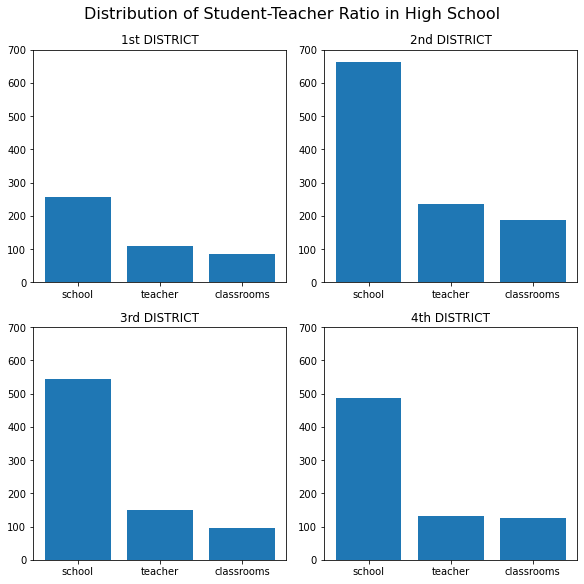

In [27]:
# Insert code here
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

first_district = ncr_district[ncr_district.index =="Manila, Ncr, First District"]
second_district = ncr_district[ncr_district.index =="Ncr Second District"]
third_district = ncr_district[ncr_district.index =="Ncr Third District"]
fourth_district = ncr_district[ncr_district.index =="Ncr Fourth District"]

for i in [0, 1]:
    for j in [0,1]:
        
        axes[i,j].set_ylim(0,700)

axes[0,0].bar(first_district["variable"], first_district['value']) 
axes[0,0].set_title("1st DISTRICT")
axes[0,1].bar(second_district["variable"], second_district['value']) 
axes[0,1].set_title('2nd DISTRICT')
axes[1,0].bar(third_district["variable"], third_district['value']) 
axes[1,0].set_title('3rd DISTRICT')
axes[1,1].bar(fourth_district["variable"], fourth_district['value']) 
axes[1,1].set_title('4th DISTRICT')

fig.suptitle('Distribution of Student-Teacher Ratio in High School', fontsize=16)
plt.show()